<a href="https://colab.research.google.com/github/gsush/Data_analyst_udacity/blob/main/average_classroom_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from google.colab import files
uploaded = files.upload()


Saving course_page_actions.csv to course_page_actions (2).csv


In [10]:
import io
df = pd.read_csv(io.BytesIO(uploaded['course_page_actions.csv']))

df.head()

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437


In [11]:
# The duration represents the total number of seconds
# each student spent on the course overview page.

# get the average reading duration for control group
control_mean = df.query('group == "control"')['duration'].mean()

# get the average reading duration for experiment group
experiment_mean = df.query('group == "experiment"')['duration'].mean()

# display average reading duration for each group
control_mean, experiment_mean


(115.40710650582038, 130.93220512539477)

In [12]:
# compute observed difference in reading duration
obs_diff = experiment_mean - control_mean

# display observed difference
obs_diff

15.525098619574393

In [13]:
# create sampling distribution of difference in average reading durations
# with boostrapping
diffs = []
for _ in range(10000):
    
    b_samp = df.sample(df.shape[0], replace=True)
    control_mean = b_samp.query('group == "control"')['duration'].mean()
    experiment_mean = b_samp.query('group == "experiment"')['duration'].mean()
    diffs.append(experiment_mean - control_mean)

In [14]:
# convert to numpy array
diffs = np.array(diffs)

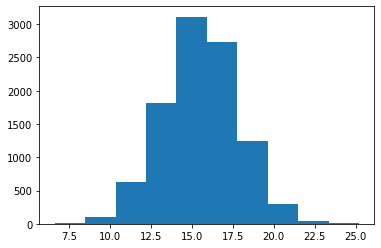

In [15]:
# plot sampling distribution
plt.hist(diffs);

In [16]:
# simulate distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)

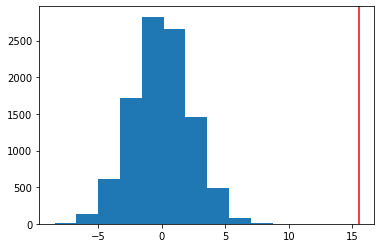

In [17]:
# plot null distribution
plt.hist(null_vals)

# plot line for observed statistic
plt.axvline(obs_diff, c='red')

In [18]:
# compute p value
(null_vals > obs_diff).mean()

0.0